In [2]:
"""
@original_author: Dominik Cedro
@date_of_creation: 2024-04-05
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Electricity.csv', skiprows=4,index_col=0)
print(df.head())
print('********************************')
print(df.info())
print('********************************')
print(df.describe())
print('********************************')
print(df.tail())
print('********************************')

# Prepare the data
print(df.isnull().sum())
df = df.dropna()
print('********************************')

print(df.head())


          all sectors million kilowatthours  \
Month                                         
Dec 2022                                NaN   
Oct 2022                       292257.74617   
Oct 2022                                NaN   
Oct 2022                                NaN   
Sep 2022                       297195.94414   

          residential million kilowatthours  commercial million kilowatthours  \
Month                                                                           
Dec 2022                                NaN                               NaN   
Oct 2022                       103152.07773                      106857.96303   
Oct 2022                                NaN                               NaN   
Oct 2022                                NaN                               NaN   
Sep 2022                        99792.19117                      111851.35754   

          industrial million kilowatthours  
Month                                       
Dec 2022    

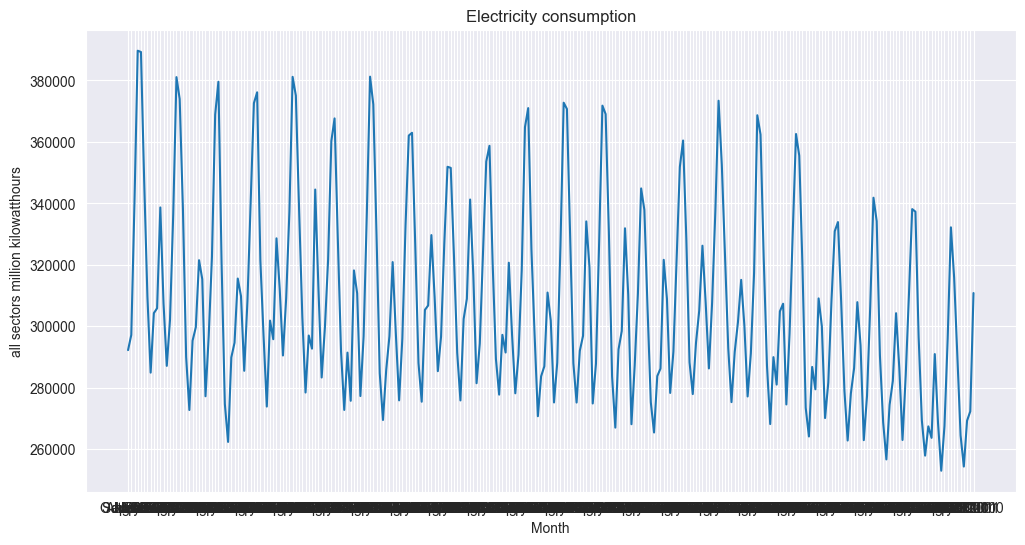

In [4]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='all sectors million kilowatthours')
plt.title('Electricity consumption')
plt.show()



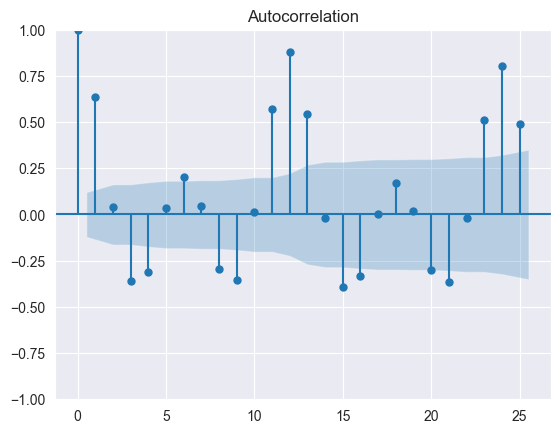

In [5]:
# plot autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['all sectors million kilowatthours'])
plt.show()


In [6]:
# Ljung box text
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(df['all sectors million kilowatthours'], lags=10)
print(ljung_box)


       lb_stat     lb_pvalue
1   108.369976  2.230105e-25
2   108.781184  2.390375e-24
3   143.511952  6.609291e-31
4   169.342019  1.447710e-35
5   169.625998  8.767948e-35
6   180.748873  2.352623e-36
7   181.307932  1.031293e-35
8   204.712875  6.488557e-40
9   238.943084  2.146604e-46
10  238.997297  1.112488e-45


In [8]:
# Dickey fuller test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['all sectors million kilowatthours'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -0.999836
p-value: 0.753324
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


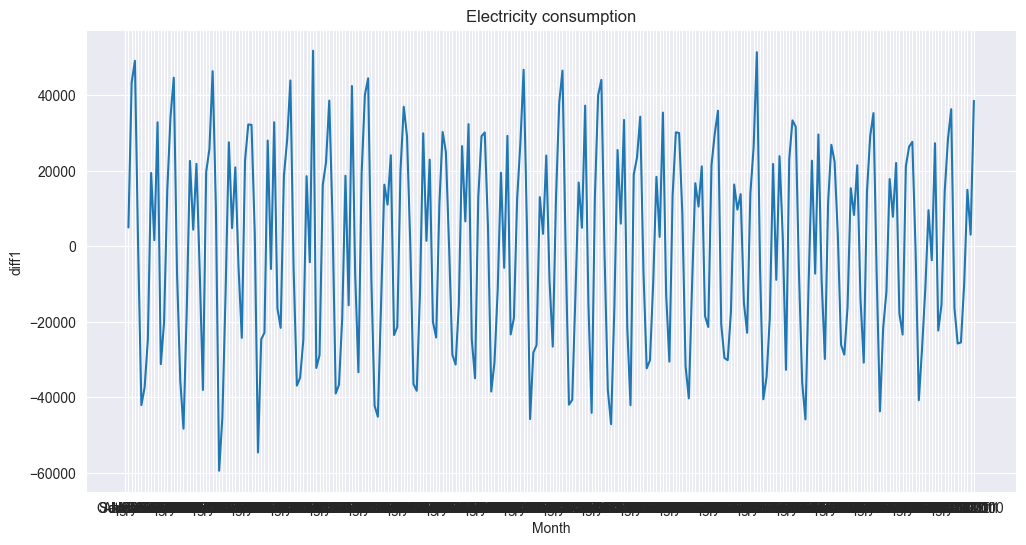

In [9]:
# differencing 1
df['diff1'] = df['all sectors million kilowatthours'].diff()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='diff1')
plt.title('Electricity consumption')
plt.show()

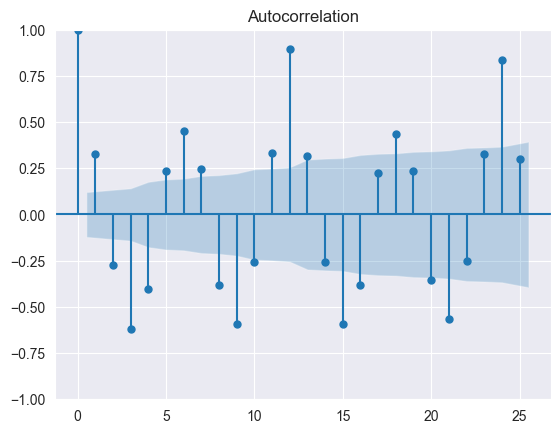

In [10]:
# autocorrelation
plot_acf(df['diff1'].dropna())
plt.show()


In [11]:
# Ljung box test
ljung_box = acorr_ljungbox(df['diff1'].dropna(), lags=10)
print(ljung_box)


       lb_stat     lb_pvalue
1    28.763066  8.179620e-08
2    48.563210  2.848609e-11
3   150.383700  2.177682e-32
4   194.244266  6.488743e-41
5   209.021746  3.332950e-43
6   263.607111  5.056584e-54
7   280.263318  9.865511e-57
8   319.952663  2.319249e-64
9   415.638576  6.292549e-84
10  433.581782  6.620871e-87


In [12]:
# Dickey fuller test
result = adfuller(df['diff1'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.496748
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


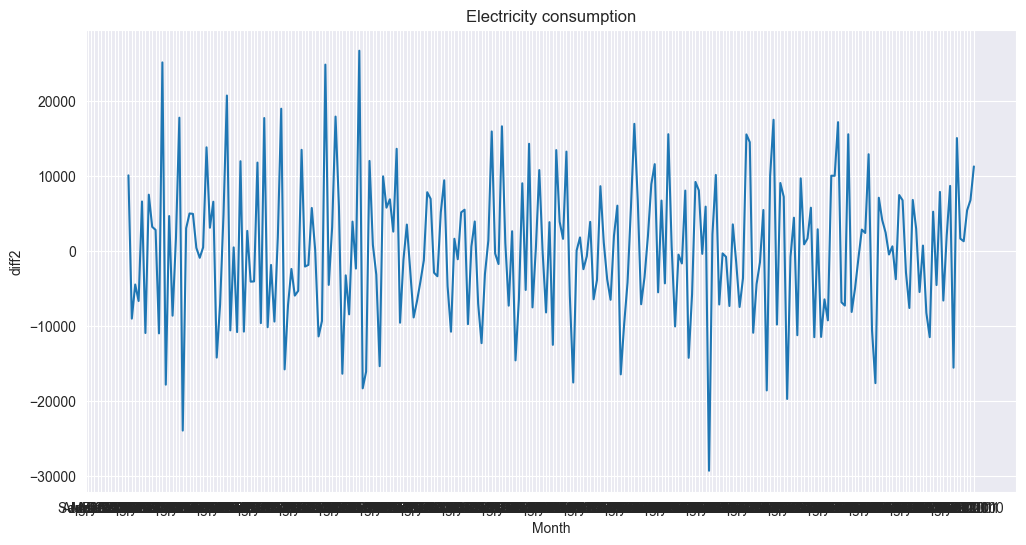

In [13]:
# differencing 2
df['diff2'] = df['diff1'].diff(12)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='diff2')
plt.title('Electricity consumption')
plt.show()


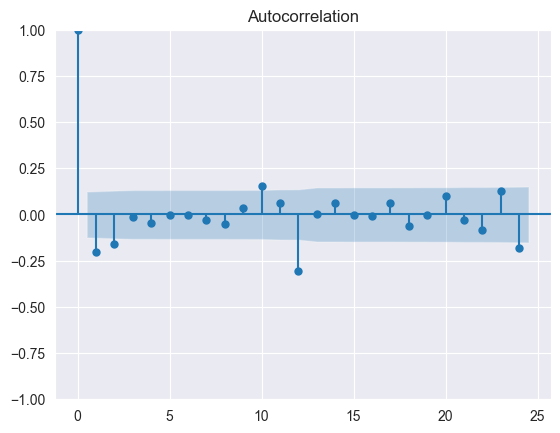

In [14]:
# autocorrelation
plot_acf(df['diff2'].dropna())
plt.show()


In [15]:
# Ljung box test
ljung_box = acorr_ljungbox(df['diff2'].dropna(), lags=10)
print(ljung_box)


      lb_stat  lb_pvalue
1   10.612623   0.001123
2   16.923818   0.000211
3   16.972547   0.000716
4   17.532681   0.001523
5   17.534027   0.003591
6   17.535401   0.007504
7   17.794096   0.012934
8   18.504417   0.017747
9   18.802108   0.026929
10  25.085090   0.005187


In [16]:
# Dickey fuller test
result = adfuller(df['diff2'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.920589
p-value: 0.000000
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
